# Data Diri

- Nama : Faisal Ahmad Gifari
- Jenis Kelamin : Laki-Laki
- Pekerjaaan : Mahasiswa
- Tempat/Tanggal Lahir : Kuningan, 17 September 2002
- Username : faisal_ag_037
- email : pd-20379543@edu.jakarta.go.id
- No. Telepon : 085775063559
- Kota Domisili : Jakarta Barat
- Institusi : UIN Syarif Hidayatullah Jakarta


#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import tensorflow as tf

In [2]:
main_dataframe = pd.read_csv("//content//drive//MyDrive//Datasets//AAPL.csv")

# EDA

In [3]:
main_dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


Dataset yang digunakan memiliki jumlah sampel lebih dari 10000

In [4]:
main_dataframe.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103227,37363200
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107583,46950400
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113245,48003200
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123699,55574400


In [5]:
main_dataframe.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
10458,2022-06-06,147.029999,148.570007,144.899994,146.139999,146.139999,71598400
10459,2022-06-07,144.350006,149.000000,144.100006,148.710007,148.710007,67808200
10460,2022-06-08,148.580002,149.869995,147.460007,147.960007,147.960007,53950200
10461,2022-06-09,147.080002,147.949997,142.529999,142.639999,142.639999,69473000
10462,2022-06-10,140.279999,140.759995,137.059998,137.130005,137.130005,91437900
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900
10467,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.559998,134118500


In [6]:
main_dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [7]:
main_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [8]:
main_dataframe.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: xlabel='Date'>

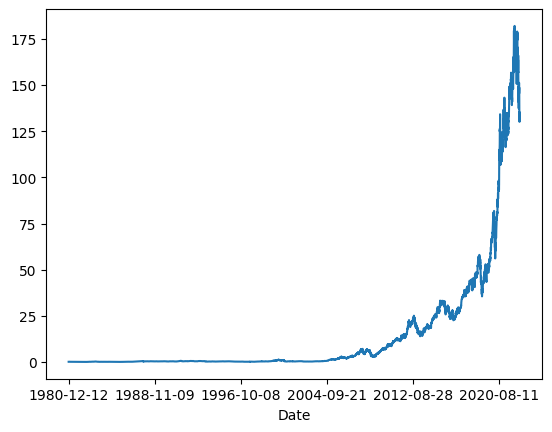

In [9]:
main_dataframe.set_index('Date')['Close'].plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

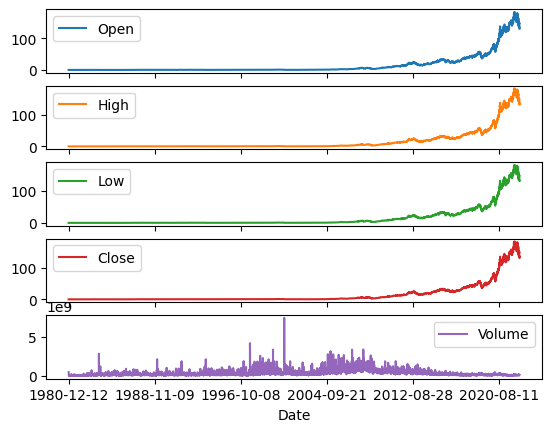

In [10]:
main_dataframe.set_index('Date')[['Open', 'High', 'Low', 'Close', 'Volume']].plot(subplots=True)

In [11]:
print('test')

test


# Data Preprocessing

In [12]:
close_only = main_dataframe.filter(['Close'])

In [13]:
scaler = MinMaxScaler(feature_range = (0, 1))
close_scaled = scaler.fit_transform(close_only)

In [14]:
close_scaled

array([[4.35483696e-04],
       [3.98684579e-04],
       [3.49613594e-04],
       ...,
       [7.44010911e-01],
       [7.14499102e-01],
       [7.22742631e-01]])

In [15]:
df_date = main_dataframe['Date'].values



In [16]:
df_date

array(['1980-12-12', '1980-12-15', '1980-12-16', ..., '2022-06-15',
       '2022-06-16', '2022-06-17'], dtype=object)

Pembagian Validation set sebesar 20% dari total dataset

In [17]:
X_date_train, X_date_test, y_close_train, y_close_test = train_test_split(df_date,
                                                                          close_scaled,
                                                                          test_size = 0.2,
                                                                          shuffle = False )

In [18]:
X_date_train

array(['1980-12-12', '1980-12-15', '1980-12-16', ..., '2014-02-21',
       '2014-02-24', '2014-02-25'], dtype=object)

In [19]:
X_date_test

array(['2014-02-26', '2014-02-27', '2014-02-28', ..., '2022-06-15',
       '2022-06-16', '2022-06-17'], dtype=object)

In [20]:
y_close_train

array([[0.00043548],
       [0.00039868],
       [0.00034961],
       ...,
       [0.10282331],
       [0.10327474],
       [0.1021972 ]])

In [21]:
y_close_test

array([[0.10127275],
       [0.1032983 ],
       [0.10301763],
       ...,
       [0.74401091],
       [0.7144991 ],
       [0.72274263]])

Fungsi ini mengubah deret waktu menjadi format yang sesuai untuk melatih model pembelajaran mesin untuk prediksi deret waktu. Ini membuat urutan nilai window_size yang berurutan sebagai fitur masukan dan memasangkan setiap urutan dengan nilai pada langkah waktu berikutnya sebagai variabel target. Fitur masukan dan variabel target yang dihasilkan dikelompokkan ke dalam kumpulan dengan ukuran batch_size, dan urutan kumpulan tersebut diacak. Fungsi ini mengembalikan objek tf.data.Dataset yang dapat digunakan untuk melatih model.

In [22]:
def win_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  Dataset = tf.data.Dataset.from_tensor_slices(series)
  Dataset = Dataset.window(window_size + 1, shift=1, drop_remainder=True)
  Dataset = Dataset.flat_map(lambda w: w.batch(window_size + 1))
  Dataset = Dataset.shuffle(shuffle_buffer)
  Dataset = Dataset.map(lambda w: (w[:-1], w[-1:]))
  return Dataset.batch(batch_size).prefetch(1)

In [23]:
train_dataset = win_dataset(y_close_train, window_size=60, batch_size=100, shuffle_buffer=1000)
val_dataset = win_dataset(y_close_test, window_size=60, batch_size=100, shuffle_buffer=1000)

In [24]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1, 1), dtype=tf.float64, name=None))>

# Modelling

Model menggunakan Model Sequential

In [25]:
shape_1 = None
shape_2 = 1

In [26]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(128, input_shape=([shape_1, shape_2]), return_sequences = True),
  tf.keras.layers.LSTM(64, return_sequences = True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1)
])

In [27]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 128)         66560     
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          49408     
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 dense (Dense)               (None, None, 64)          4160      
                                                                 
 dropout_1 (Dropout)         (None, None, 64)          0         
                                                                 
 dense_1 (Dense)             (None, None, 32)          2080      
                                                                 
 dense_2 (Dense)             (None, None, 16)          5

Optimizer sudah menggunakan learning rate

In [28]:
optimize = tf.keras.optimizers.Adam(learning_rate=1.0000e-04)
model1.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimize,
              metrics=["mae"])

Batas yang sudah disesuaikan berdasarkan data. berikut adalah threshold untuk MAE sebesar 10% dari skala data

In [29]:
threshold_MAE = (close_scaled.max() - close_scaled.min()) * 10/100
print(threshold_MAE)

0.09999999999999998


Callback yang akan mengehentikan proses pelatihan jika mencapai batas yang sudah ditentukan. Proses pelatihan akan berhenti jika MAE dan val MAE berada di bawah threshold

In [30]:
class EarlyStopper(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae') < threshold_MAE and logs.get('val_mae') < threshold_MAE):
          print("MAE and val MAE has reached below the threshold")
          self.model.stop_training = True


In [31]:
EarlyStopper1 = EarlyStopper()

In [32]:
class MaePlot(tf.keras.callbacks.Callback):

    def on_train_begin(self, logs={}):
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('mae'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_mae'))

        if len(self.losses) > 1:

            N = np.arange(0, len(self.losses))

            plt.figure()
            plt.plot(N, self.losses, label = "loss")
            plt.plot(N, self.acc, label = "mae")
            plt.plot(N, self.val_losses, label = "val_loss")
            plt.plot(N, self.val_acc, label = "val_mae")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/MAE")
            plt.legend()
            plt.show()
            plt.close()

In [33]:
MaePlot1 = MaePlot()

Epoch 1/100
84/84 - 13s - loss: 1.5776e-04 - mae: 0.0082 - val_loss: 0.0478 - val_mae: 0.2289 - 13s/epoch - 150ms/step
Epoch 2/100


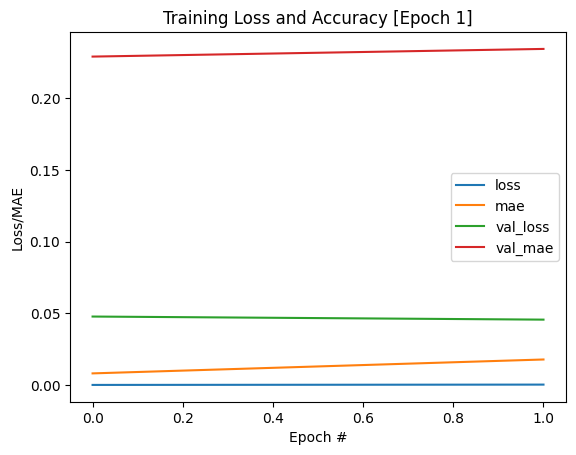

84/84 - 3s - loss: 3.8095e-04 - mae: 0.0179 - val_loss: 0.0456 - val_mae: 0.2342 - 3s/epoch - 31ms/step
Epoch 3/100


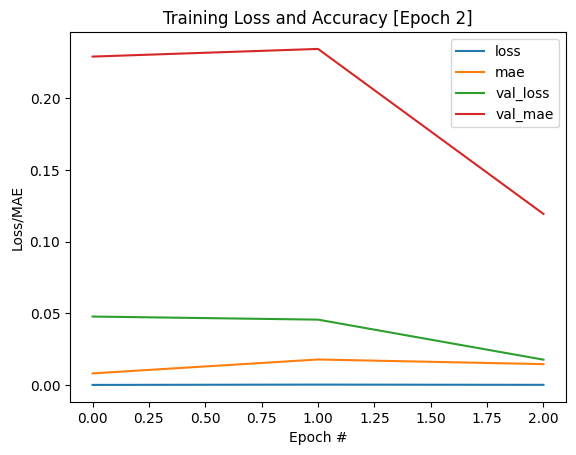

84/84 - 3s - loss: 2.0777e-04 - mae: 0.0146 - val_loss: 0.0178 - val_mae: 0.1193 - 3s/epoch - 34ms/step
Epoch 4/100


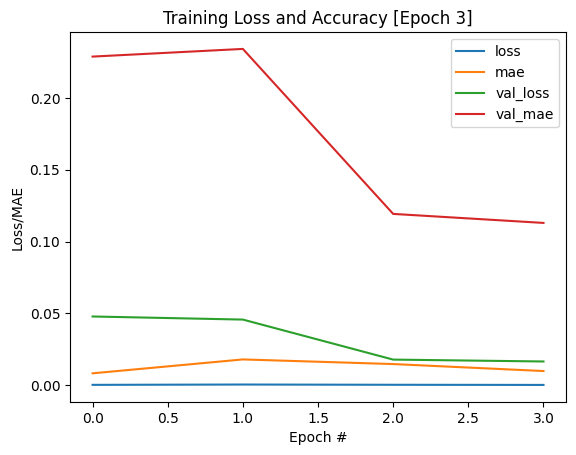

84/84 - 3s - loss: 1.0876e-04 - mae: 0.0098 - val_loss: 0.0164 - val_mae: 0.1130 - 3s/epoch - 34ms/step
Epoch 5/100


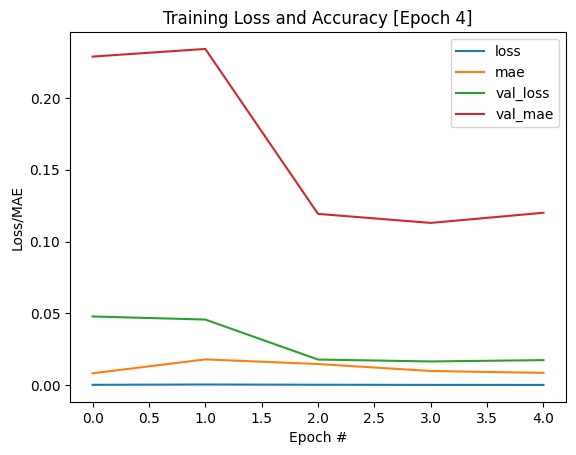

84/84 - 5s - loss: 8.4326e-05 - mae: 0.0085 - val_loss: 0.0174 - val_mae: 0.1200 - 5s/epoch - 63ms/step
Epoch 6/100


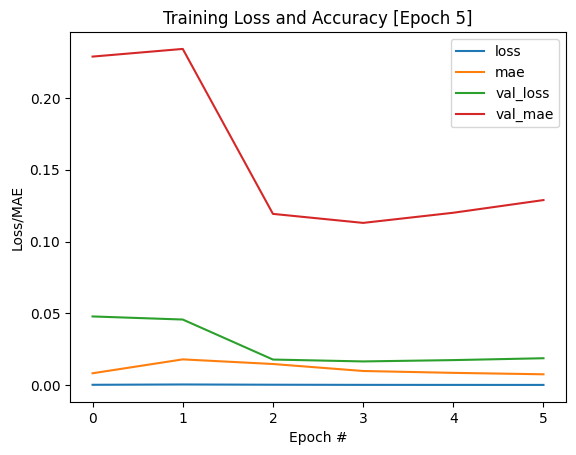

84/84 - 3s - loss: 7.0601e-05 - mae: 0.0075 - val_loss: 0.0187 - val_mae: 0.1289 - 3s/epoch - 33ms/step
Epoch 7/100


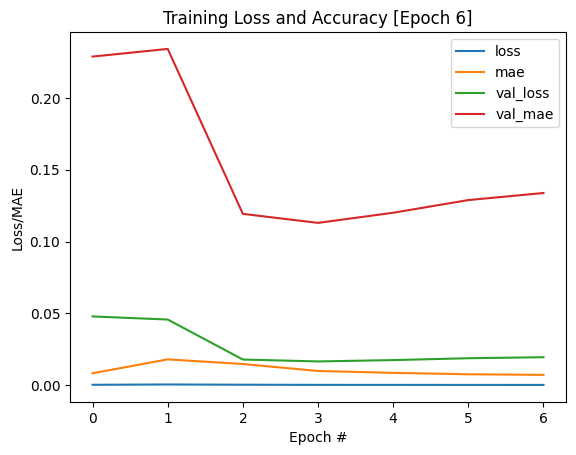

84/84 - 5s - loss: 6.6052e-05 - mae: 0.0071 - val_loss: 0.0194 - val_mae: 0.1338 - 5s/epoch - 58ms/step
Epoch 8/100


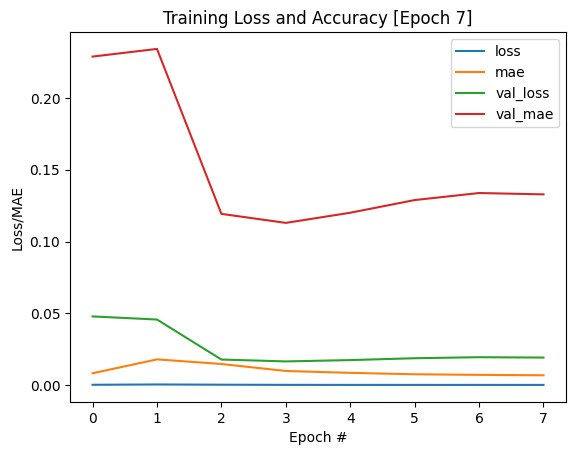

84/84 - 3s - loss: 6.3006e-05 - mae: 0.0068 - val_loss: 0.0191 - val_mae: 0.1329 - 3s/epoch - 30ms/step
Epoch 9/100


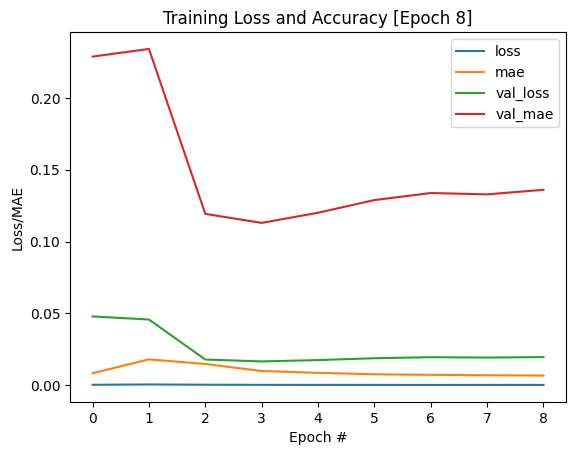

84/84 - 3s - loss: 5.8702e-05 - mae: 0.0066 - val_loss: 0.0195 - val_mae: 0.1360 - 3s/epoch - 30ms/step
Epoch 10/100


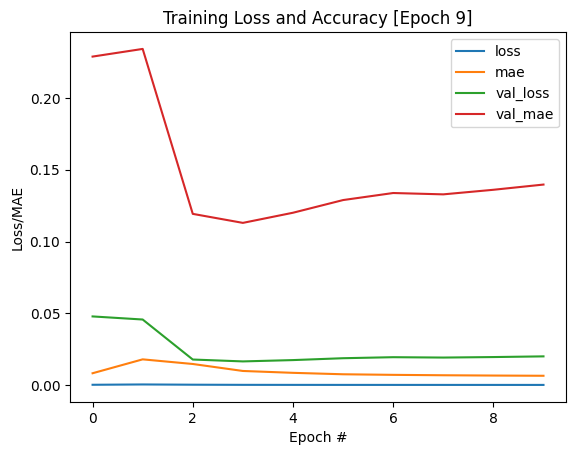

84/84 - 3s - loss: 5.5541e-05 - mae: 0.0064 - val_loss: 0.0200 - val_mae: 0.1397 - 3s/epoch - 41ms/step
Epoch 11/100


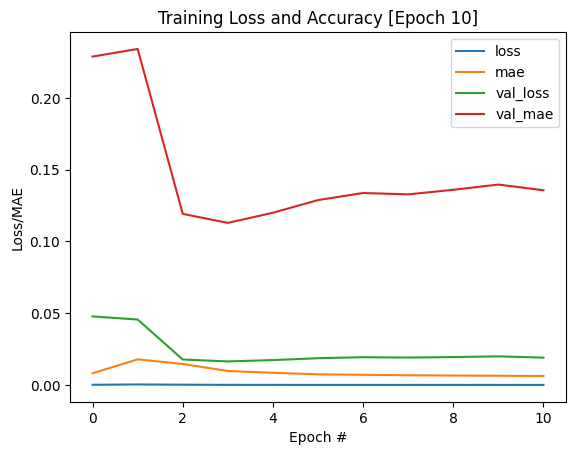

84/84 - 5s - loss: 5.3783e-05 - mae: 0.0063 - val_loss: 0.0191 - val_mae: 0.1357 - 5s/epoch - 55ms/step
Epoch 12/100


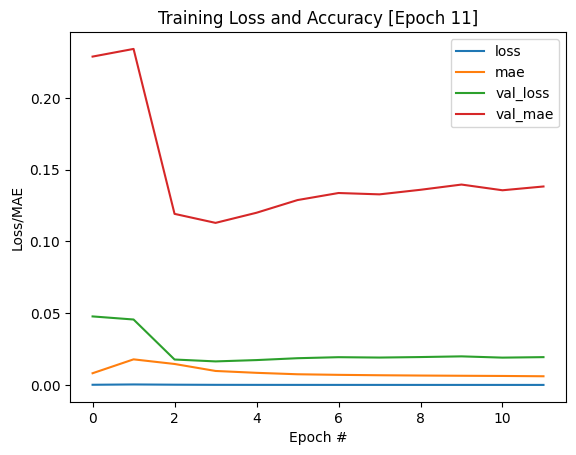

84/84 - 2s - loss: 5.0897e-05 - mae: 0.0061 - val_loss: 0.0194 - val_mae: 0.1383 - 2s/epoch - 29ms/step
Epoch 13/100


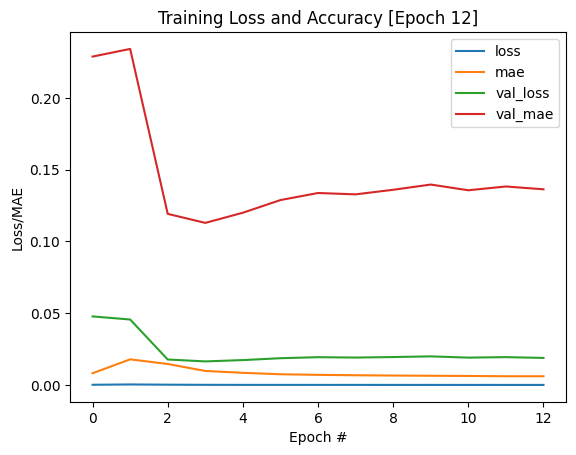

84/84 - 3s - loss: 4.9917e-05 - mae: 0.0061 - val_loss: 0.0189 - val_mae: 0.1364 - 3s/epoch - 30ms/step
Epoch 14/100


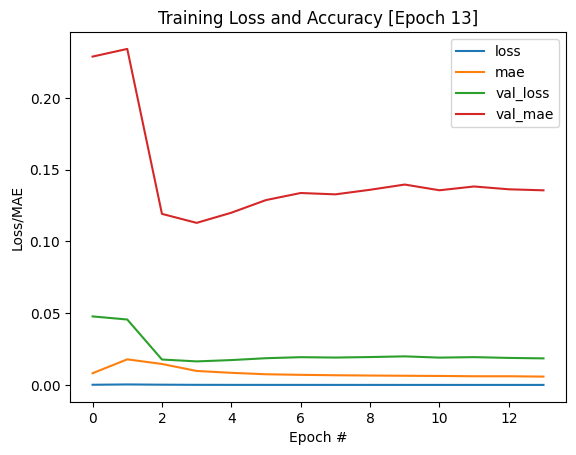

84/84 - 3s - loss: 4.7396e-05 - mae: 0.0058 - val_loss: 0.0185 - val_mae: 0.1357 - 3s/epoch - 32ms/step
Epoch 15/100


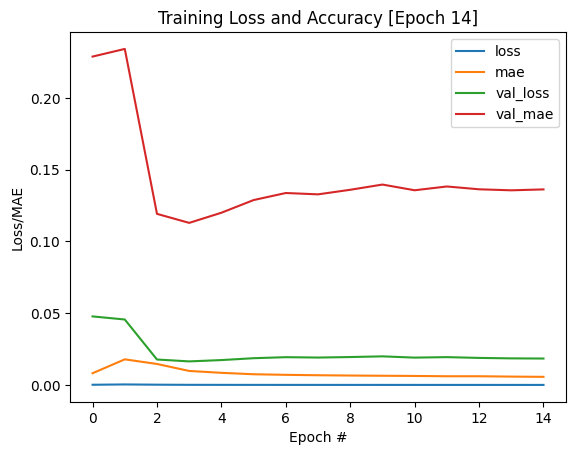

84/84 - 5s - loss: 4.4507e-05 - mae: 0.0057 - val_loss: 0.0184 - val_mae: 0.1363 - 5s/epoch - 59ms/step
Epoch 16/100


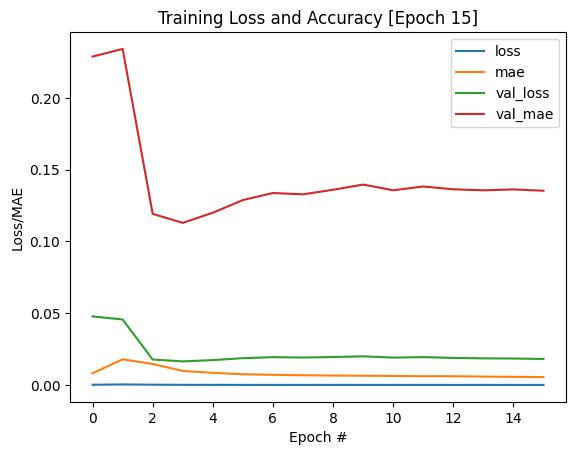

84/84 - 3s - loss: 4.2619e-05 - mae: 0.0055 - val_loss: 0.0181 - val_mae: 0.1354 - 3s/epoch - 33ms/step
Epoch 17/100


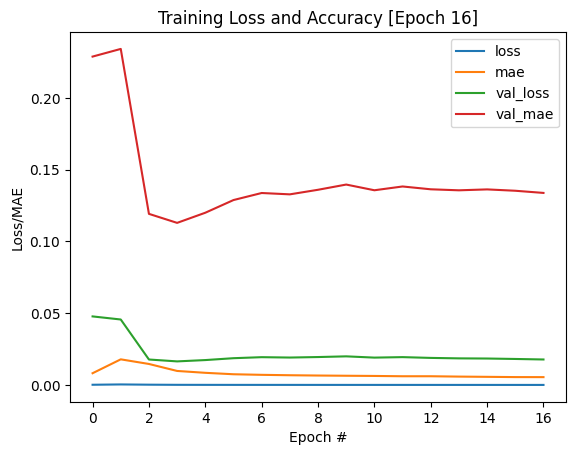

84/84 - 3s - loss: 4.2800e-05 - mae: 0.0055 - val_loss: 0.0178 - val_mae: 0.1338 - 3s/epoch - 30ms/step
Epoch 18/100


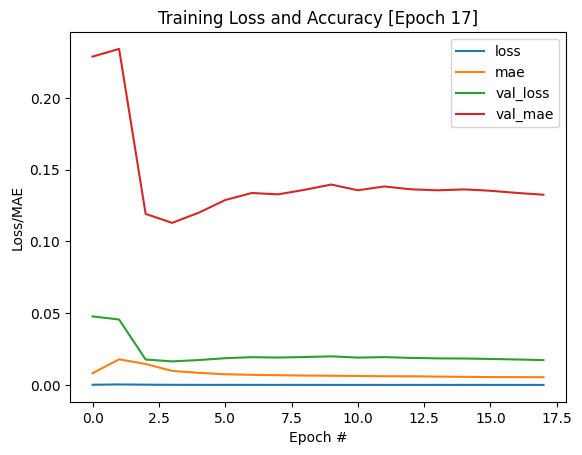

84/84 - 3s - loss: 4.1705e-05 - mae: 0.0054 - val_loss: 0.0173 - val_mae: 0.1326 - 3s/epoch - 34ms/step
Epoch 19/100


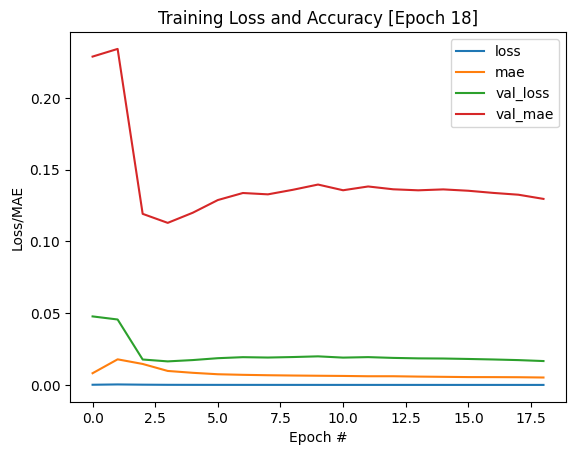

84/84 - 3s - loss: 3.9064e-05 - mae: 0.0052 - val_loss: 0.0167 - val_mae: 0.1297 - 3s/epoch - 30ms/step
Epoch 20/100


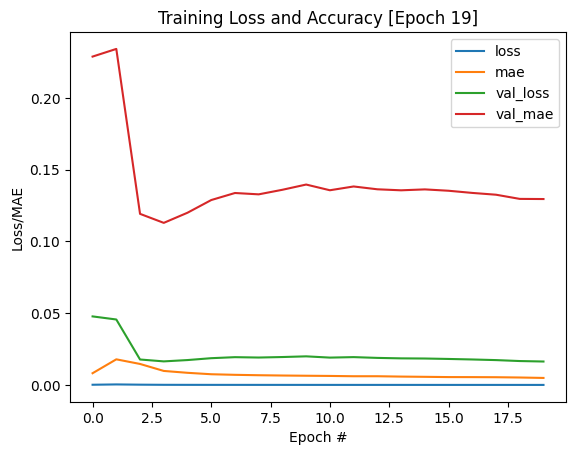

84/84 - 3s - loss: 3.5343e-05 - mae: 0.0049 - val_loss: 0.0163 - val_mae: 0.1296 - 3s/epoch - 34ms/step
Epoch 21/100


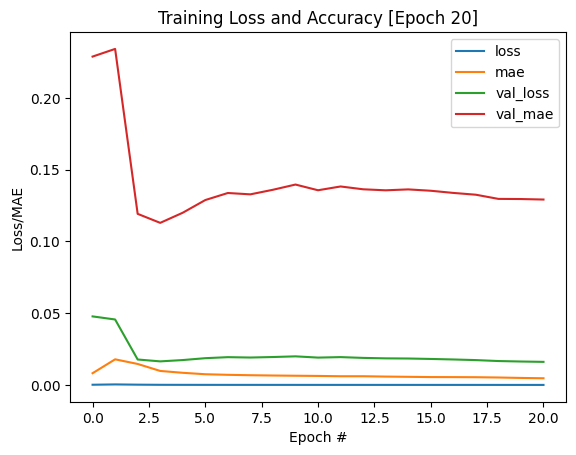

84/84 - 3s - loss: 3.1876e-05 - mae: 0.0047 - val_loss: 0.0161 - val_mae: 0.1292 - 3s/epoch - 34ms/step
Epoch 22/100


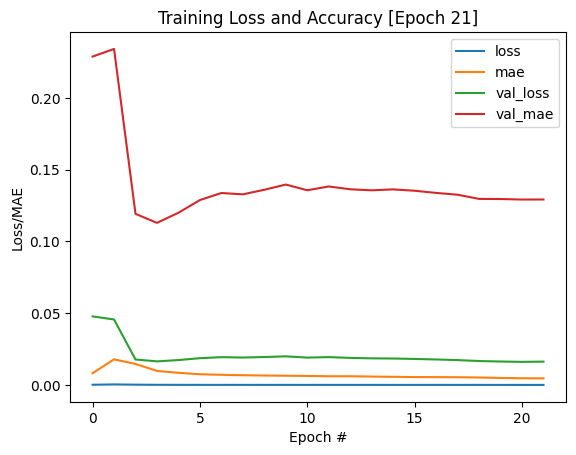

84/84 - 3s - loss: 3.2093e-05 - mae: 0.0046 - val_loss: 0.0163 - val_mae: 0.1293 - 3s/epoch - 36ms/step
Epoch 23/100


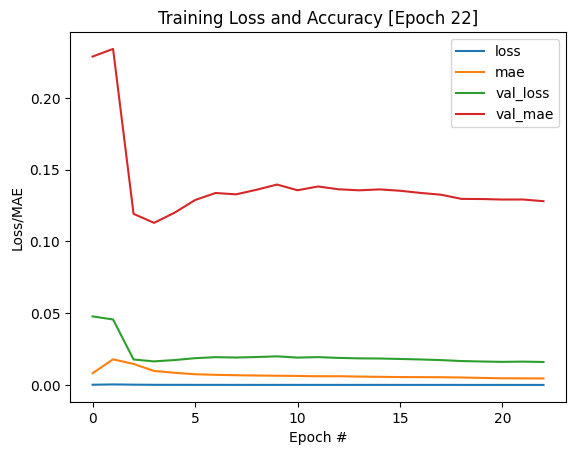

84/84 - 2s - loss: 3.1087e-05 - mae: 0.0045 - val_loss: 0.0160 - val_mae: 0.1281 - 2s/epoch - 29ms/step
Epoch 24/100


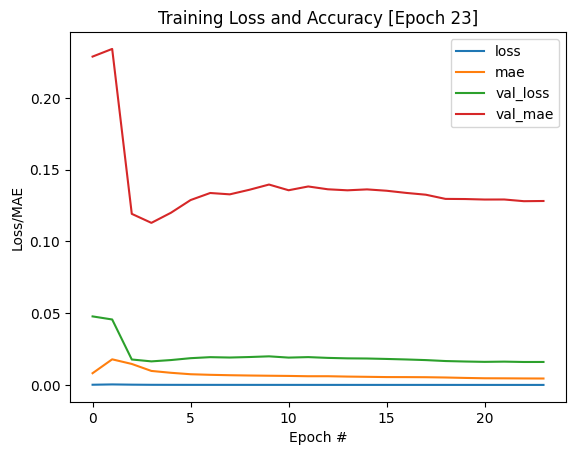

84/84 - 2s - loss: 3.0329e-05 - mae: 0.0045 - val_loss: 0.0160 - val_mae: 0.1282 - 2s/epoch - 29ms/step
Epoch 25/100


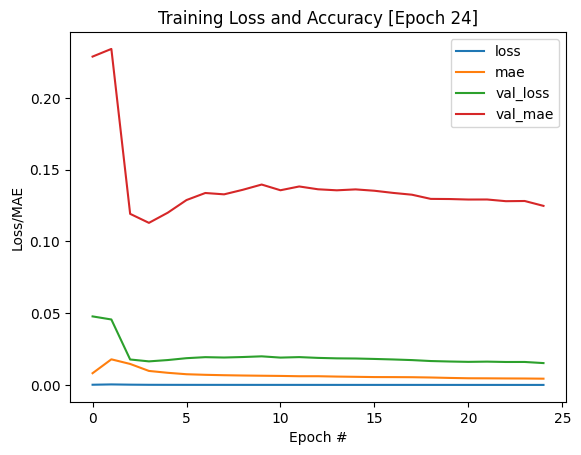

84/84 - 3s - loss: 2.8842e-05 - mae: 0.0044 - val_loss: 0.0152 - val_mae: 0.1248 - 3s/epoch - 33ms/step
Epoch 26/100


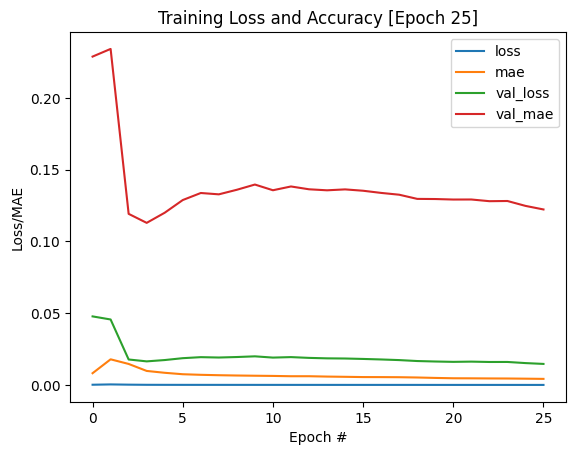

84/84 - 3s - loss: 2.7392e-05 - mae: 0.0042 - val_loss: 0.0147 - val_mae: 0.1223 - 3s/epoch - 36ms/step
Epoch 27/100


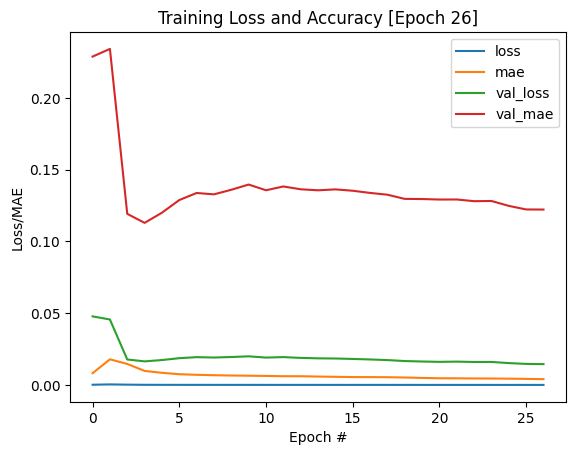

84/84 - 3s - loss: 2.5450e-05 - mae: 0.0041 - val_loss: 0.0145 - val_mae: 0.1223 - 3s/epoch - 34ms/step
Epoch 28/100


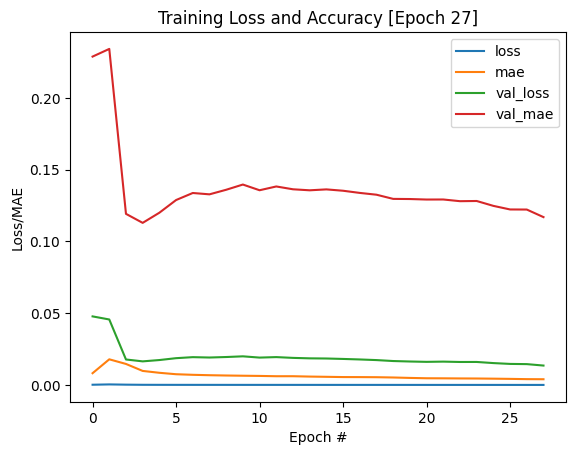

84/84 - 2s - loss: 2.4917e-05 - mae: 0.0040 - val_loss: 0.0135 - val_mae: 0.1170 - 2s/epoch - 29ms/step
Epoch 29/100


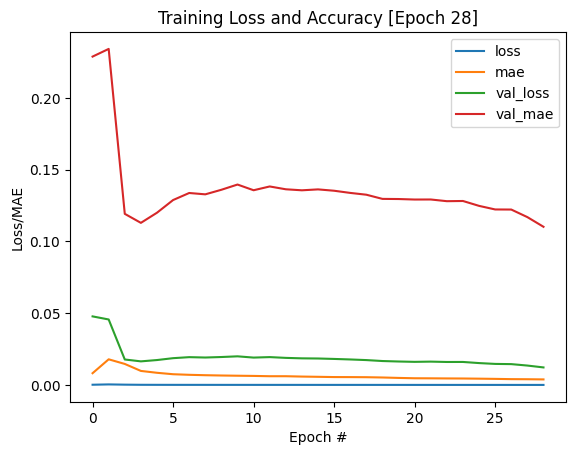

84/84 - 2s - loss: 2.3677e-05 - mae: 0.0039 - val_loss: 0.0122 - val_mae: 0.1102 - 2s/epoch - 29ms/step
Epoch 30/100


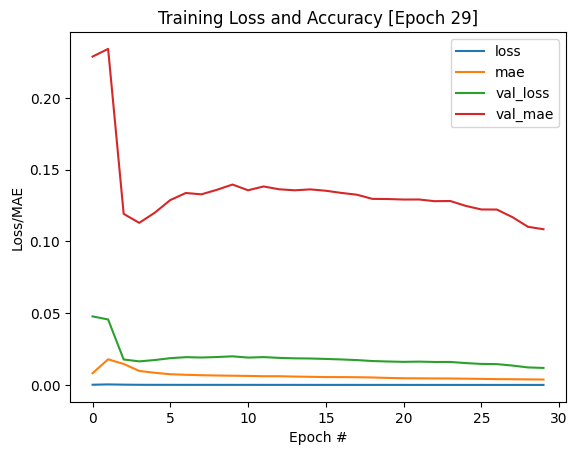

84/84 - 5s - loss: 2.2988e-05 - mae: 0.0038 - val_loss: 0.0119 - val_mae: 0.1085 - 5s/epoch - 58ms/step
Epoch 31/100


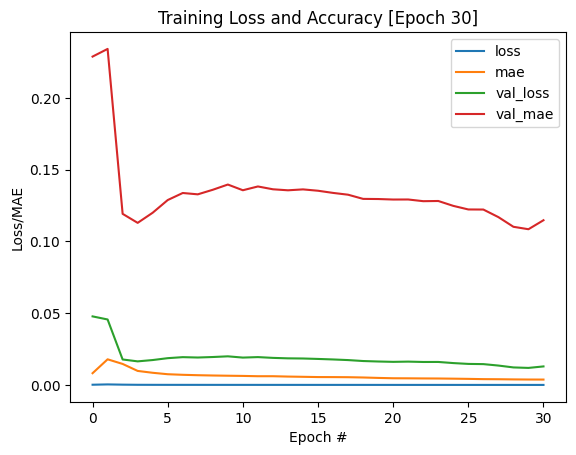

84/84 - 3s - loss: 2.2320e-05 - mae: 0.0038 - val_loss: 0.0129 - val_mae: 0.1148 - 3s/epoch - 37ms/step
Epoch 32/100


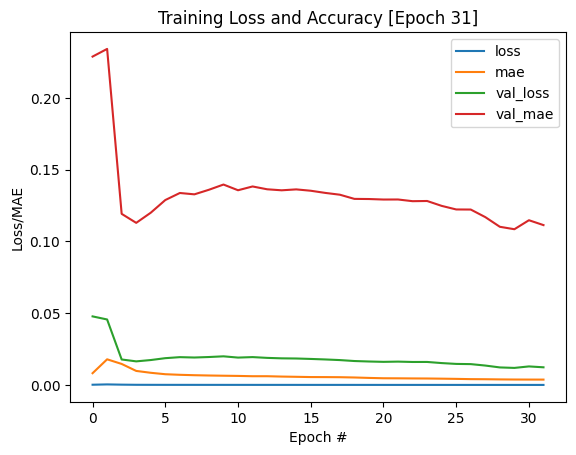

84/84 - 3s - loss: 2.1872e-05 - mae: 0.0037 - val_loss: 0.0123 - val_mae: 0.1114 - 3s/epoch - 30ms/step
Epoch 33/100


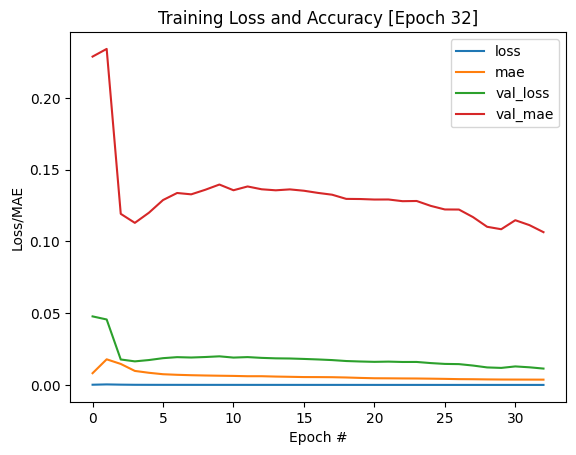

84/84 - 3s - loss: 2.1482e-05 - mae: 0.0037 - val_loss: 0.0114 - val_mae: 0.1065 - 3s/epoch - 31ms/step
Epoch 34/100


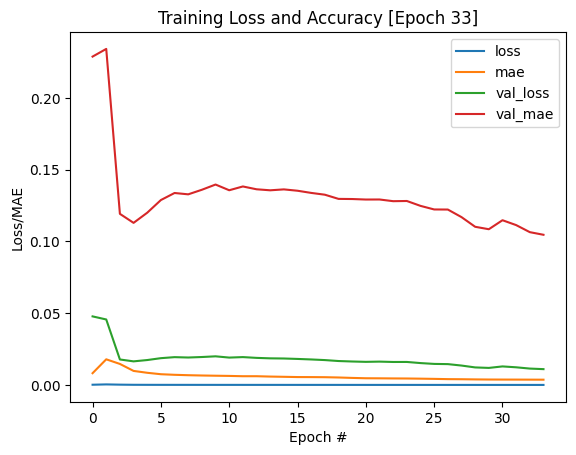

84/84 - 3s - loss: 2.1170e-05 - mae: 0.0037 - val_loss: 0.0110 - val_mae: 0.1047 - 3s/epoch - 34ms/step
Epoch 35/100
MAE and val MAE has reached below the threshold


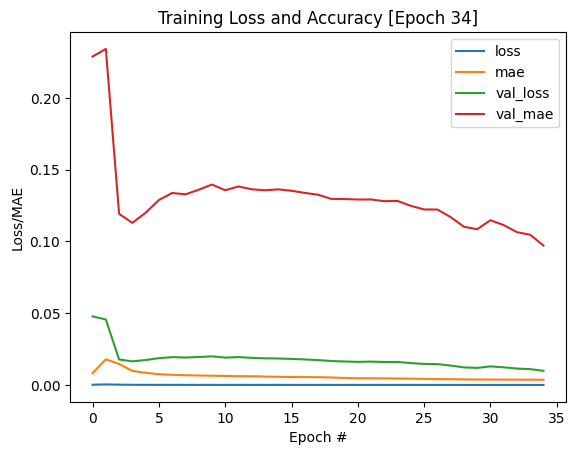

84/84 - 6s - loss: 2.0632e-05 - mae: 0.0036 - val_loss: 0.0099 - val_mae: 0.0972 - 6s/epoch - 66ms/step


In [34]:
model1.fit(train_dataset,
          epochs=100,
          batch_size=100,
          validation_data=val_dataset,
          verbose=2,
          callbacks = [EarlyStopper1, MaePlot1],
          shuffle=False)

Proses training model sudah berhasil dan berhenti sesuai dengan Callback yang diatur berdasarkan MAE Threshold sebesar kurang dari 10% skala data dari sebuah data yang memiliki lebih dari 10000 sampel.